In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import make_moons, load_digits
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, roc_curve, 
                             precision_recall_curve, f1_score, classification_report, plot_precision_recall_curve)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB

sns.set()

function for visualizing data with labels

In [2]:
def visualize(X, labels):
    
    unique_labels = set(labels)
    N = len(unique_labels)
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('CMAP', cmaplist, cmap.N)
    
    
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap)
    
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    
    plt.legend(*scatter.legend_elements(), fontsize=16)

function for drawing handwritten numbers

In [3]:
def draw_digits(X, target):
  fig = plt.figure(figsize=(6,6))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.05, wspace=0.05)
  for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(target[i]))

function for drawing confusion_matrix

In [4]:
def draw_confusion_matrix(ytest, ypred):
  matrix = confusion_matrix(ytest, ypred)
  #sns.
  #print(matrix)
  plt.figure(figsize=(12, 12))
  sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=True)
  plt.xlabel('true label')
  plt.ylabel('predicted label')

### Make moons Gaussian naive Bayes

In [5]:
X, y = make_moons()

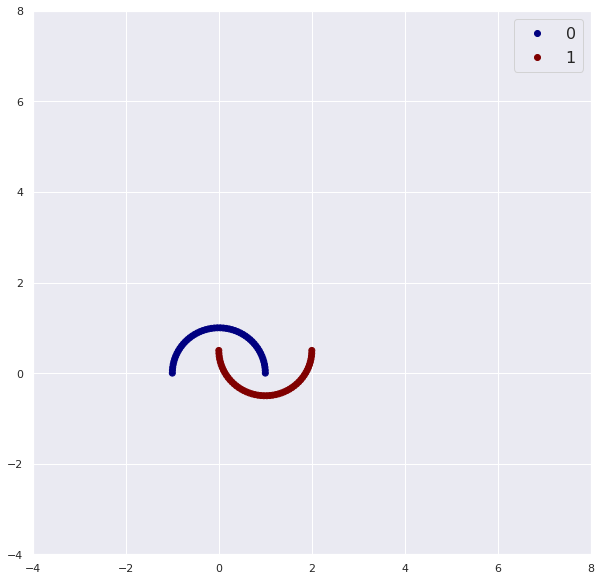

In [6]:
visualize(X, y)

split the set in training and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

test set

In [9]:
X_test

array([[-5.72116660e-01,  8.20172255e-01],
       [ 3.45365054e-01,  9.38468422e-01],
       [ 3.20515776e-02,  9.99486216e-01],
       [ 4.04783343e-01,  9.14412623e-01],
       [ 2.05460725e-03,  4.35929780e-01],
       [-9.81559157e-01,  1.91158629e-01],
       [ 1.80141362e+00, -9.81105305e-02],
       [ 0.00000000e+00,  5.00000000e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [ 6.54634946e-01, -4.38468422e-01],
       [-8.71318704e-01,  4.90717552e-01],
       [ 1.84408430e-02,  3.08841371e-01],
       [-9.00968868e-01,  4.33883739e-01],
       [-9.91790014e-01,  1.27877162e-01],
       [ 1.67230089e+00, -2.40277997e-01],
       [ 4.27883340e-01, -3.20172255e-01],
       [ 9.67948422e-01, -4.99486216e-01],
       [-5.18392568e-01,  8.55142763e-01],
       [ 9.26916757e-01,  3.75267005e-01],
       [ 1.40478334e+00, -4.14412623e-01]])

In [10]:
res = clf.predict(X_test)

res

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [11]:
visualize(X_test, res)

In [12]:
accuracy_score(res, y_test)

0.85

In [13]:
y_train_pred = clf.predict(X_train)
as1 = accuracy_score(y_train_pred, y_train)

y_test_pred = clf.predict(X_test)
as2 = accuracy_score(y_test_pred, y_test)
print(as1, as2)

0.8875 0.85


In [14]:
proba = clf.predict_proba(X_train)
plt.figure(figsize=(8,8))
plt.scatter(X_train[:,0], X_train[:, 1], c=proba[:, 0], cmap='cool')
plt.colorbar()
plt.show()

In [15]:
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.67      0.80         9

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20



precision-recall curve

In [16]:
# Only binary classifier
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall ')

Text(0.5, 1.0, '2-class Precision-Recall ')

roc curve

In [17]:
# Only binary classifier
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

### Make moons Multinomial naive Bayes

In [18]:
# Offset for multinomial model
x_max_abs = np.abs(X).max()
X += x_max_abs

In [19]:
visualize(X, y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
mnb = MultinomialNB()

In [22]:
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
res = mnb.predict(X_test)

In [24]:
accuracy_score(res, y_test)

0.8

In [25]:
visualize(X_test, res)

In [26]:
y_train_pred = mnb.predict(X_train)
as1 = accuracy_score(y_train_pred, y_train)

y_test_pred = mnb.predict(X_test)
as2 = accuracy_score(y_test_pred, y_test)
print(as1, as2)

0.8125 0.8


In [27]:
proba = mnb.predict_proba(X_train)
plt.figure(figsize=(8,8))
plt.scatter(X_train[:,0], X_train[:, 1], c=proba[:, 0], cmap='cool')
plt.colorbar()
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall ')

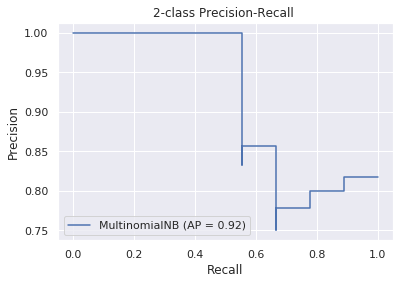

In [28]:
# Only binary classifier
disp = plot_precision_recall_curve(mnb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall ')

In [29]:
# Only binary classifier
metrics.plot_roc_curve(mnb, X_test, y_test)
plt.show()

### Digits Gaussian naive Bayes

In [30]:
dst = load_digits()

In [31]:
dst.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [32]:
print(dst.images.shape)
print(dst.target.shape)

(1797, 8, 8)
(1797,)


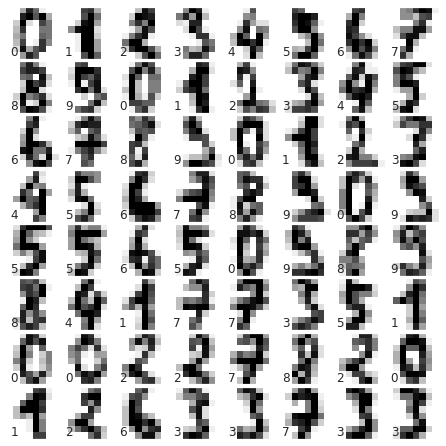

In [33]:
draw_digits(dst.images, dst.target)

In [34]:
X2 = dst.data
y2 = dst.target

In [35]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

In [36]:
cl = GaussianNB()

In [37]:
cl.fit(X_train2, y_train2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
res = cl.predict(X_test2)

In [39]:
accuracy_score(res, y_test2)

0.8666666666666667

In [40]:
res.shape, y_test2.shape

((360,), (360,))

In [41]:
X_test2.shape

(360, 64)

In [42]:
prpr = cl.predict_proba(X_test2)

probs = [(np.argmax(row),row.max()) for row in prpr]

probs[0:10]

[(9, 1.0),
 (7, 1.0),
 (1, 0.9999906173122208),
 (3, 0.9999531058089047),
 (3, 0.9981598199019265),
 (8, 0.9946719382164902),
 (7, 1.0),
 (4, 1.0),
 (7, 1.0),
 (5, 0.9999999999999964)]

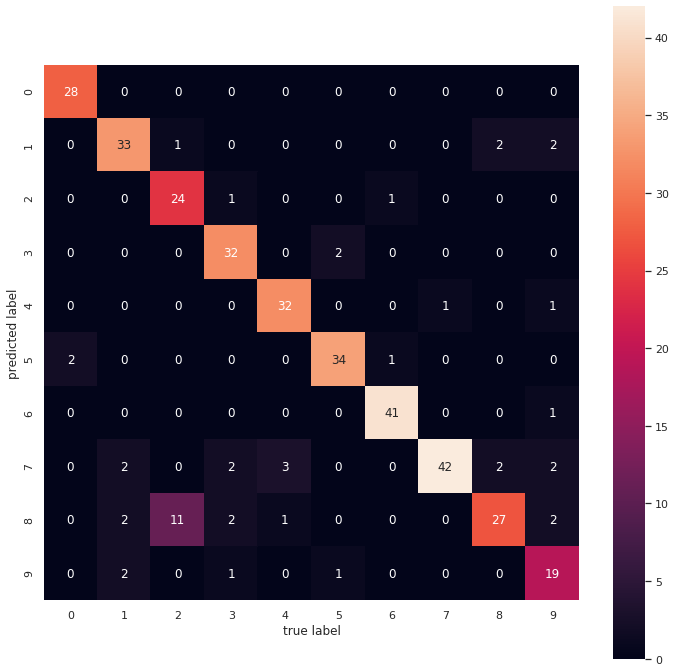

In [43]:
draw_confusion_matrix(y_test2, res)

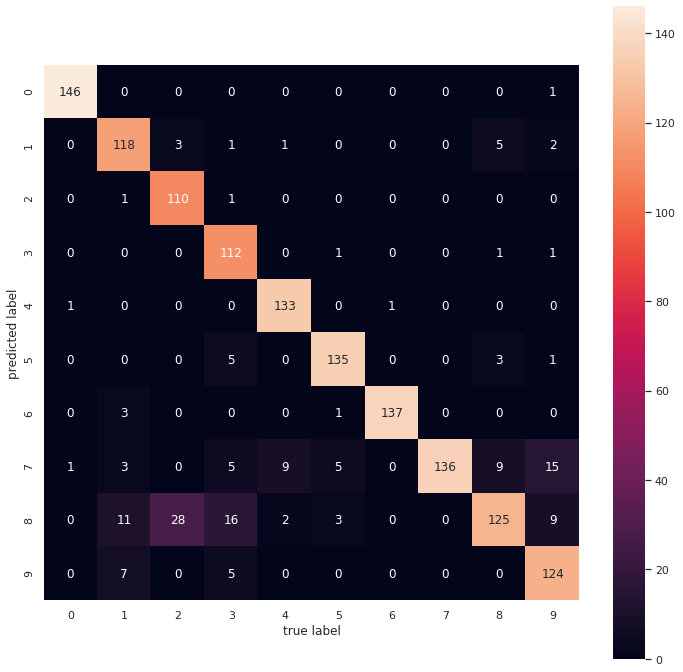

In [44]:
train_res = cl.predict(X_train2)
draw_confusion_matrix(y_train2, train_res)

In [45]:
print(classification_report(y_test2, res))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.87      0.85      0.86        39
           2       0.92      0.67      0.77        36
           3       0.94      0.84      0.89        38
           4       0.94      0.89      0.91        36
           5       0.92      0.92      0.92        37
           6       0.98      0.95      0.96        43
           7       0.79      0.98      0.88        43
           8       0.60      0.87      0.71        31
           9       0.83      0.70      0.76        27

    accuracy                           0.87       360
   macro avg       0.88      0.86      0.86       360
weighted avg       0.88      0.87      0.87       360



### Digits Multinomial naive Bayes

In [46]:
mnb = MultinomialNB()

In [47]:
mnb.fit(X_train2, y_train2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
res = mnb.predict(X_test2)

accuracy_score(res, y_test2)

0.9083333333333333

In [49]:
prpr = mnb.predict_proba(X_test2)

prob = [(np.argmax(row),row.max()) for row in prpr]

prob[3:17]

[(3, 1.0),
 (3, 1.0),
 (8, 0.9999999906272024),
 (7, 0.9999998672115086),
 (4, 1.0),
 (7, 1.0),
 (5, 0.9999984787709966),
 (4, 1.0),
 (2, 1.0),
 (1, 1.0),
 (9, 0.9818104478100533),
 (4, 1.0),
 (1, 0.8588056142342672),
 (3, 0.9999999999993179)]

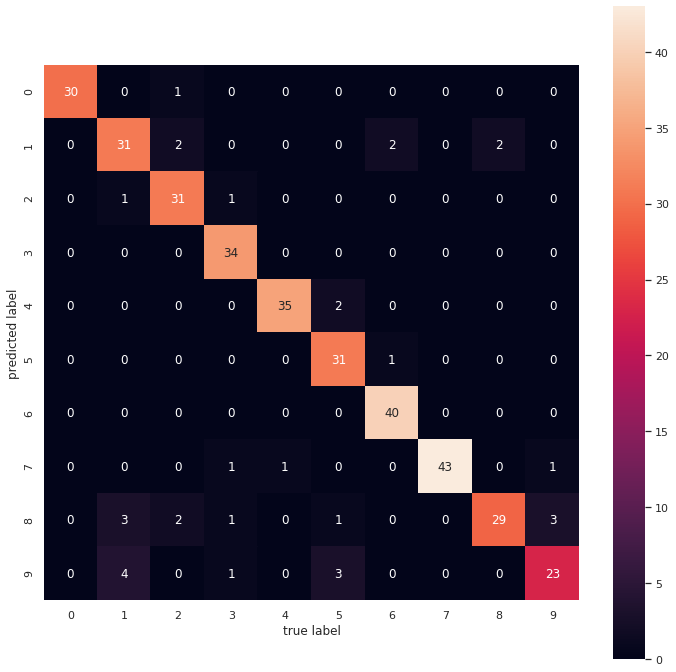

In [50]:
draw_confusion_matrix(y_test2, res)

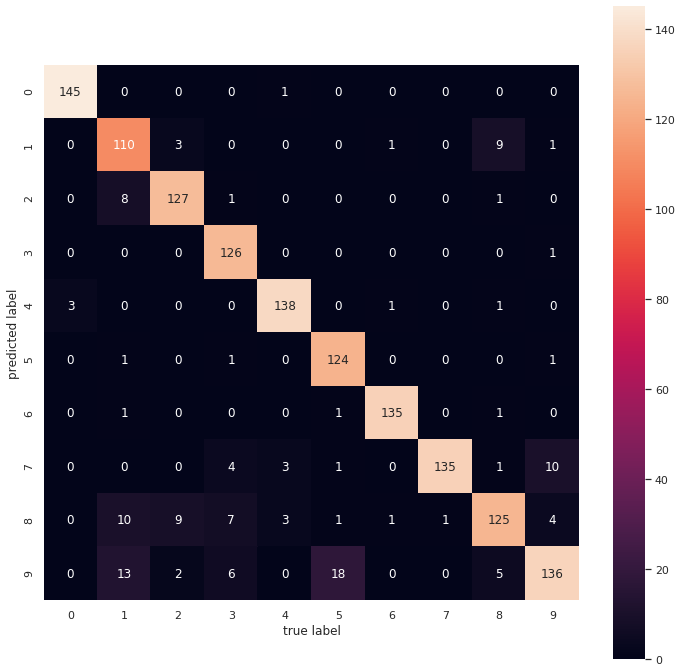

In [51]:
train_res = mnb.predict(X_train2)
draw_confusion_matrix(y_train2, train_res)

In [52]:
print(classification_report(y_test2, res))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.84      0.79      0.82        39
           2       0.94      0.86      0.90        36
           3       1.00      0.89      0.94        38
           4       0.95      0.97      0.96        36
           5       0.97      0.84      0.90        37
           6       1.00      0.93      0.96        43
           7       0.93      1.00      0.97        43
           8       0.74      0.94      0.83        31
           9       0.74      0.85      0.79        27

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.92      0.91      0.91       360

